<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [287]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [288]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library to split data
from sklearn.model_selection import train_test_split

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score,accuracy_score, precision_score, f1_score

import random
# Time related functions.
import time

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

## Loading the dataset

In [289]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [290]:
url = "/content/drive/MyDrive/AIMLColab/Neural Networks/Project/Churn.csv"
cardChurnData = pd.read_csv(url)
df = cardChurnData.copy()

## Data Overview

### Checking shape, Information about Metadata, rows and colums and few Data

In [291]:
df.shape

(10000, 14)

In [292]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 10000 rows and 14 columns.


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [294]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check Unique and Null values and Drop irrelevant columns

In [295]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [296]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [297]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [298]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [299]:
df[df['Balance']<1]['Balance'].nunique()

1

In [300]:
df[df['EstimatedSalary']<1]['EstimatedSalary'].nunique()

0

In [301]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [302]:
# Removing RowNumber, CustomerID and Surname as it is Uniq Id's and play no role in understanding Churn
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

### Check Statistical summary and duplicate values

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [304]:
print("There are ",df.duplicated().sum(), " duplicates")

There are  0  duplicates


In [305]:
df.describe().apply(lambda x: x.apply('{0:.3f}'.format))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


### Analysis on Data Overview and Statistical summary

- **RowNumber, CustomerId and Surname has been dropped** as it play insignificant role for customer churn analysis
- There are 10000 rows and 14 columns but **RowNumber, CustomerId and Surname** had been dropped. That makes **only 11 active column for our analysis**
- There are int64, object and float64 data type and **object data type can be treated as Categorical type**
- Customer location indicates data is from **Spain, France and German**y
- With the given set of data, it shows that bank has **only 4 product**
- **There are no duplicate and null values**
- Mean values for **CreditScore-650, Age-39, Tenure-5, Balance-76485**
- Average salary of **customer is 100K**
- On an average all customer have **1.5 product**s with them
- Min value of statistical analysis on **Tenure and Estimated salary indicates require treatment**
- **Geography and Gender** can be converted as Categorical values
- Mean value for Credit score is 650, Age is 38, Tenure is 5,Balance is 76K and estimated salary id 100K
- Top 25% of customer have credit score of 718 and have 2 bank products
- Min Salary shows as 11.580, this needs to be treated

## Exploratory Data Analysis

### Re-Usable functions for EDA

In [306]:
# function to plot stacked bar chart
# Print the category counts and plot a stacked bar chart
# data: dataframe
# predictor: independent variable
# target: target variable


def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

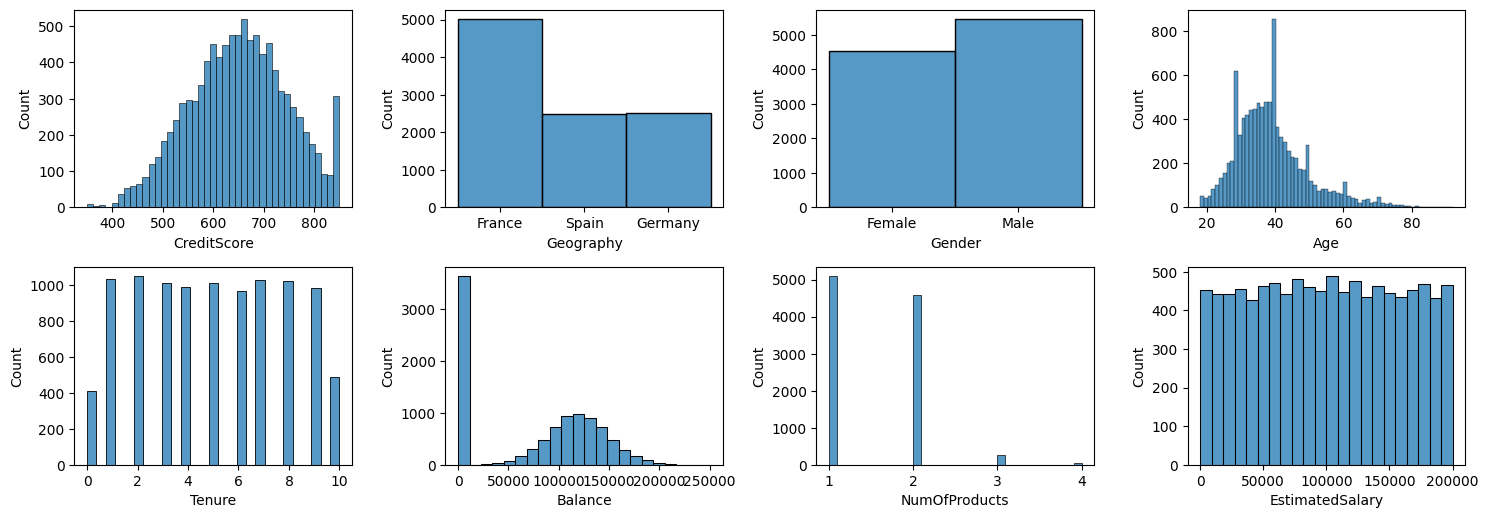

In [307]:
# defining the figure size
uni_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15, 10))

# plotting the histogram for each numerical feature
for i, feature in enumerate(uni_features):
    plt.subplot(4, 4, i+1)    # assign a subplot in the main plot
    sns.histplot(data=df, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

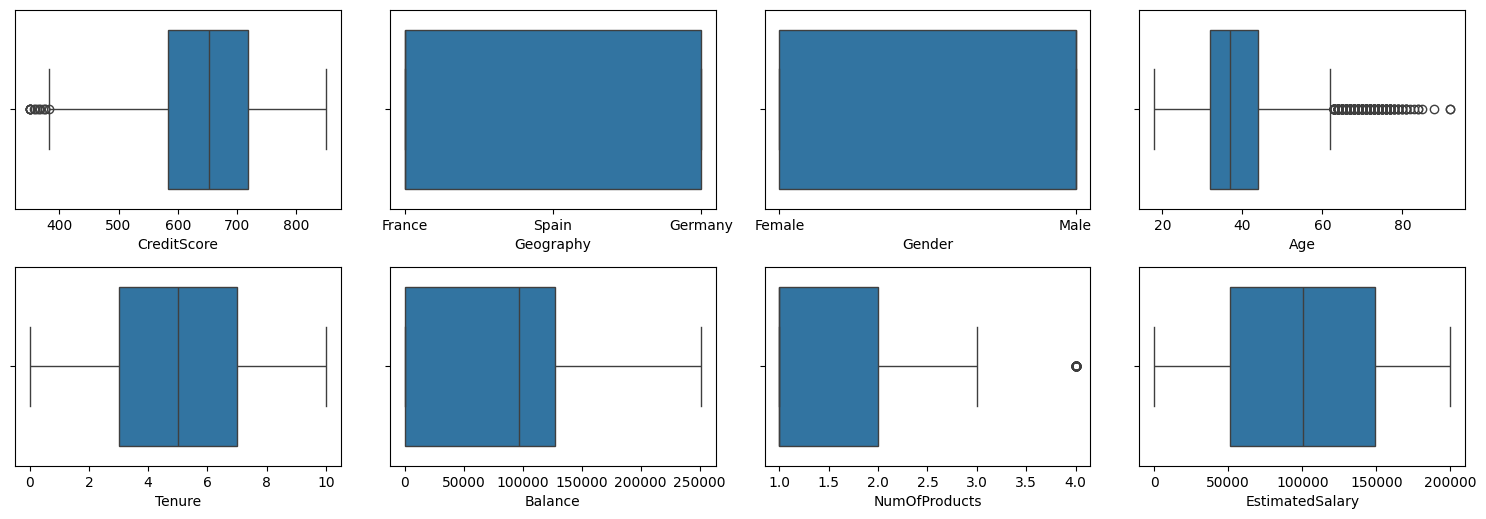

In [308]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the histogram for each numerical feature
for i, feature in enumerate(uni_features):
    plt.subplot(4, 4, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=df, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

### Analysis on **Univariate** variables

- **CreditScore** is little bit left skewed
- **50% of the customers are from France** and remaining 25% each from Spain and Germany
- 55% customers are Male and 45% are female
- Age is little bit right skewed indicating majority of the customer fall between 20 to 60 years
- **4% of the customer are with bank for over 10 years** and some even started with bank
- More or less of customer who are with bank for 2,4,6,8 year accounts 10% each
- 50% of the customer have at least 1 product with bank while 45% have 2 product and rest is negligible
- There are outliers in **CreditScore and Age**
- CreditScore indicates, there are customers with credit **score of less than 400**
- These **outliers needs to be treated**

### Bivariate Analysis

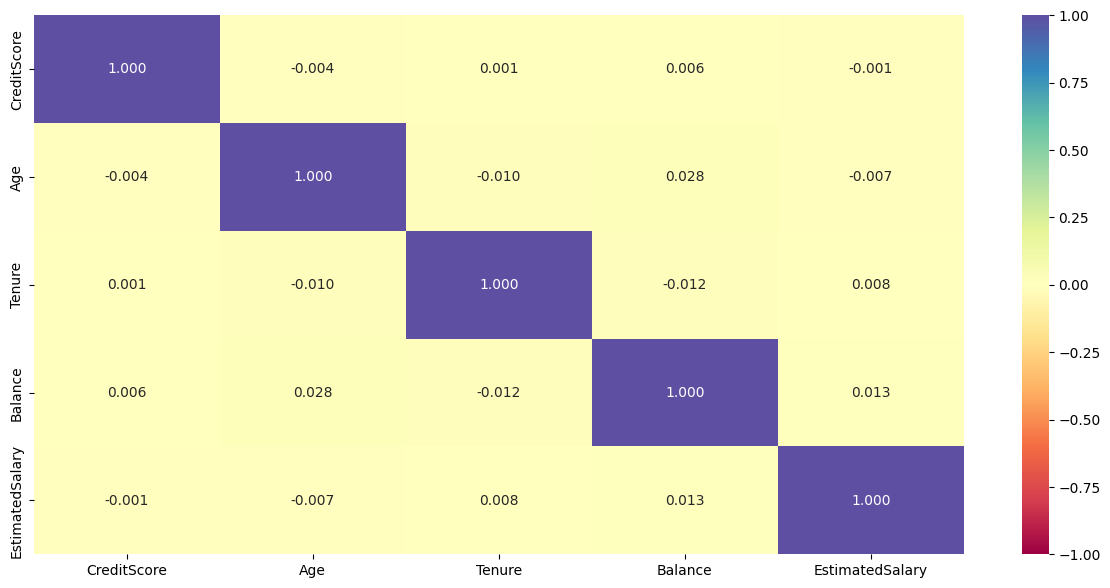

In [309]:
#Lets do Co-relation plot
cor_feature = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
plt.figure(figsize=(15, 7))
sns.heatmap(df[cor_feature].corr(), annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="Spectral")
plt.show()

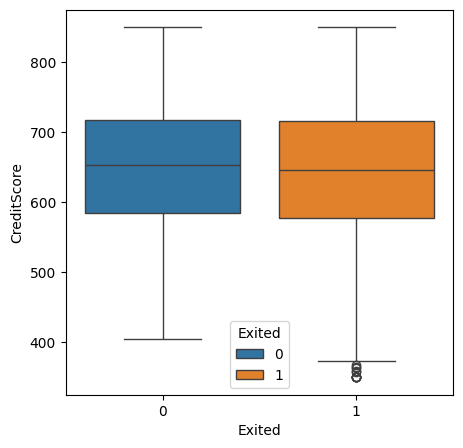

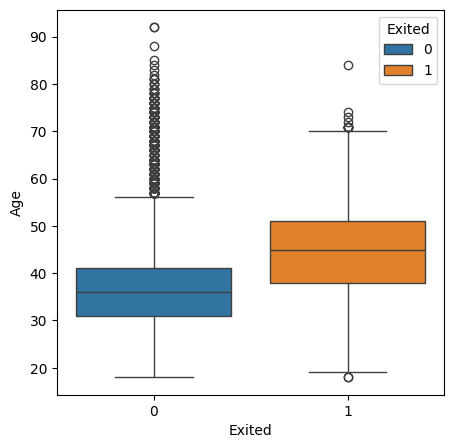

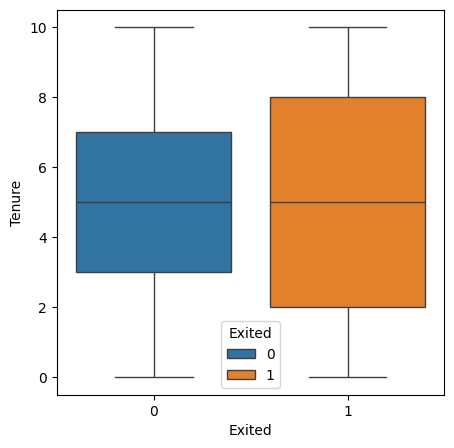

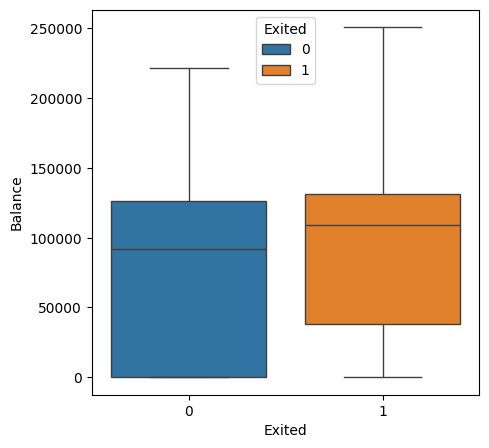

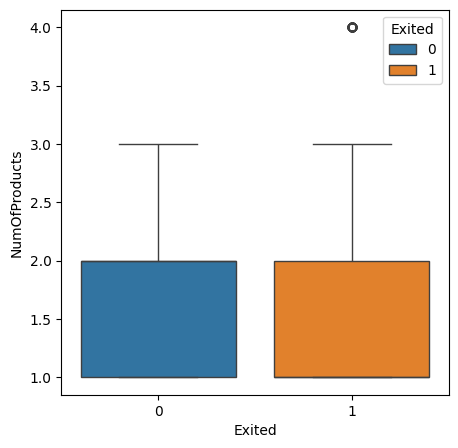

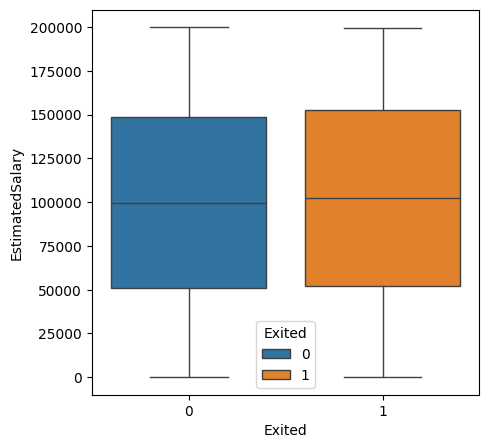

In [310]:
#Let Box_Plot againist Exited
box_bi_feature = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i, feature in enumerate(box_bi_feature):
  plt.figure(figsize=(5,5))
  sns.boxplot(y=feature,x='Exited',data=df, hue='Exited')
  plt.show()

Geography
Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


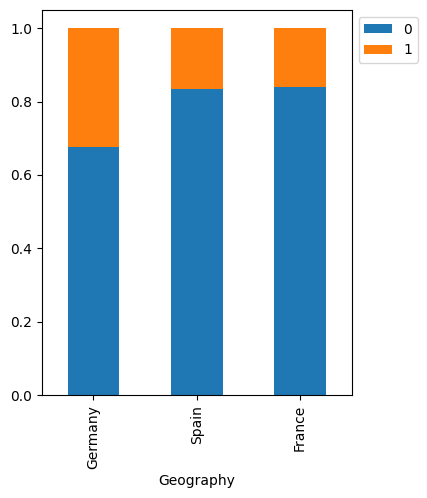

Gender
Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


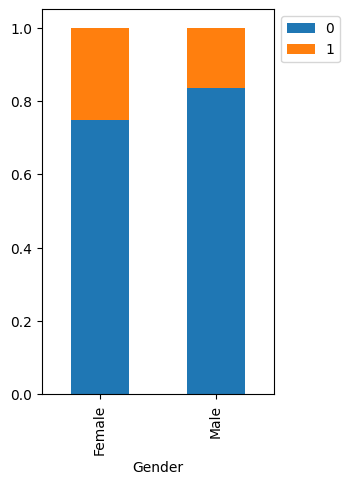

NumOfProducts
Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


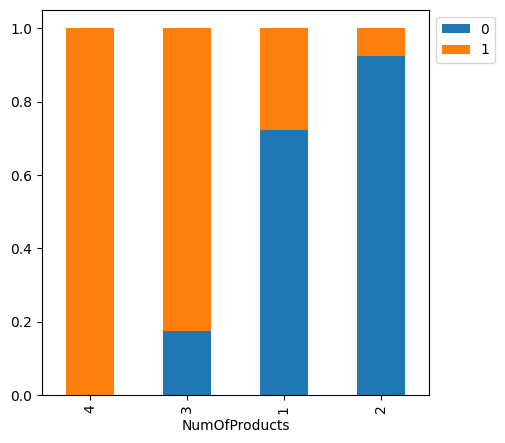

HasCrCard
Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


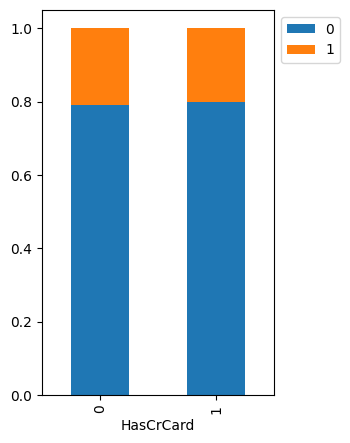

IsActiveMember
Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


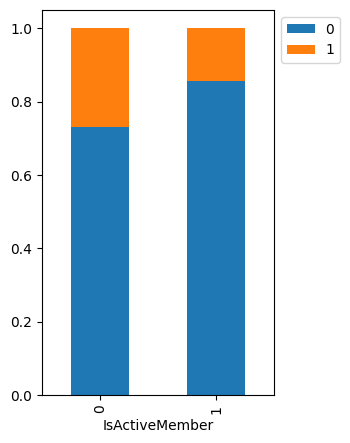

In [311]:
bi_features = ['Geography', 'Gender', 'NumOfProducts','HasCrCard', 'IsActiveMember']
for feature in bi_features:
    print(feature)
    stacked_barplot(df, feature, 'Exited')

### Analysis on **Bi-Variate** variables

- Age and EstimatedSalary has strong co-relation with Balance
- Age and Estimated salary has negative co-relation with CreditScore
- Tenure and Estimated salary has negative co-relation with Age
- Age and Balance has negative co-relation with Tenure
- CreditScore has outliers for Exited customer
- Age has outliers for both Exited and non-exited customer
- 50% of Exited and non-Exited  customer have credit score in the range of 590 to 710
- 50% of Exited customer customer are in the range of 38 to 50 years
- 50% of customer who Exited were with bank for 2 to 8 years
- 50% of Exited customer had balance of 40K to 150K
- 32% of Germans, 16% France, 16% Spain customer have Exited
- 25% of Female, 6% of Male have Exited
- All customer who had 4 products have Exited
- 82% of Customer who had 3 Product, 7% of Customer who had 2 Product, 27% of customer who had 1 product Exited
- 20% of customer who had CreditCard Exited
- 26% of Active Customer Exited

## Data Preprocessing

### Lets find out percentage of outliers and convert some columns to Categorical value

In [312]:
outlier_column = ['CreditScore', 'Age']

# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)
lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

# Percentage of outliers in each column
((df[outlier_column] < lower_whisker) | (df[outlier_column] > upper_whisker)).sum()/df.shape[0]*100

,0
CreditScore,0.15
Age,3.59


### Encoding Categorical Variables

In [313]:
newdf = df.copy()

In [314]:
#Converting to Categorical Variables
cat_cols = ['Gender', 'Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
newdf[cat_cols] = newdf[cat_cols].astype("category")

In [315]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(5), float64(2), int64(4)
memory usage: 518.4 KB


### Dummy Variable Creation

In [316]:
# dropping Exited as it is perfectly correlated with Age
X = newdf.drop(["Exited"], axis=1)
y = newdf["Exited"]

# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

### Train-validation-test Split

In [317]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)
print("Train Data -", X_train.shape, ", Validation Data - ",X_val.shape, ", Test Data",X_test.shape)

Train Data - (6000, 13) , Validation Data -  (2000, 13) , Test Data (2000, 13)


In [318]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

### Data Normalization

In [319]:
# creating an instance of the standard scaler
sc = StandardScaler()
cor_feature = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
X_train[cor_feature] = sc.fit_transform(X_train[cor_feature])
X_val[cor_feature] = sc.transform(X_val[cor_feature])
X_test[cor_feature] = sc.transform(X_test[cor_feature])

### **Analysis on Data Pre-Processing**

-  Only 3.59% outliers in Age and 0.15% outliers in CreditScore and it is negligible
- We converted Gender, Geography, NumOfProducts, HasCrCard, IsActiveMember as categorical variable to make sure ML model treats them as numerical variables
- We create dummy variables for Category data type to provide more stable models
- We have split Train, Test data as 80:20, so we will have enough data to train our model
- We appliedData normalization to enhance the performance of the model

## Model Building

### Utility Functions

* Lets define a utility function to plot Loss/Accuracy, Model Performance Classification, confusion matrix and Permutation for Feature selection on F1 Score.


In [320]:
def plot_loss_accuracy(history, name):
    """
    Function to plot loss/accuracy
    Args:
      History: an object which stores the metrics and losses.
      Name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [321]:
def model_performance_classification(
    model, predictors, target, threshold=0.5):
    """
    To compute different metrics to check classification model performance
    Args:
      Model: classifier
      Predictors: independent variables
      Target: dependent variable
      Threshold: threshold for classifying the observation as class 1
    Returns:
      df_perf: dataframe with different model performance metrics
    """
    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [322]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    Args:
      Model: classifier
      Predictors: independent variables
      Target: dependent variable
    """
    y_pred = model.predict(predictors)
    # Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
    y_pred_binary = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(target, y_pred_binary)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [323]:
def permutation_importance_f1(model, X, y, num_shuffles=10):
    """
    Compute Permutation Feature Importance based on F1 Score.
    Args:
        model: Trained Keras/TensorFlow model.
        X: Test feature data (NumPy array or Pandas DataFrame).
        y: Test labels.
        num_shuffles: Number of times to shuffle a feature to get a stable importance estimate.

    Returns:
        Feature importance scores.
    """
    # Get baseline F1 score
    baseline_preds = (model.predict(X) > 0.5).astype(int)  # Threshold predictions
    baseline_f1 = f1_score(y, baseline_preds, average='weighted')  # Weighted average for multi-class/imbalanced data

    feature_importances = {}

    # Iterate over each feature column
    for col in X.columns:
        f1_scores = []

        for _ in range(num_shuffles):
            X_shuffled = X.copy()
            X_shuffled[col] = np.random.permutation(X_shuffled[col]) # Shuffle one feature column
            shuffled_preds = (model.predict(X_shuffled) > 0.5).astype(int)
            shuffled_f1 = f1_score(y, shuffled_preds, average='weighted')
            f1_scores.append(shuffled_f1)

        # Calculate importance as the drop in F1 score
        importance = baseline_f1 - np.mean(f1_scores)
        feature_importances[col] = importance

    return np.array(feature_importances)

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**
* Predicting an Customer leaving the bank but when Customer may not be looking for it.
* Predicting an Customer not leaving Bank, but Customer actually leaving Bank


**Which case is more important?**
Both cases are actually important for the purpose of this case study.Not giving a chance to Customer(wrongly classifying them as like to Exit) might lead to loss to Bank. But, giving a chance to non-deserving Customer who will Exit will not benefit Bank either.  

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the Bank would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.

As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [324]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2557555462536627, 1: 4.909983633387888}

In [325]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Model 0

- Let's start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [326]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [327]:
#Initializing the neural network
model0 = Sequential()
model0.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model0.add(Dense(7,activation="relu"))
model0.add(Dense(1,activation="sigmoid"))

In [328]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [329]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model0.compile(loss='binary_crossentropy', optimizer=optimizer)

In [330]:
start = time.time()
history = model0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.4068 - val_loss: 0.6804
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3436 - val_loss: 0.6506
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3281 - val_loss: 0.6171
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2535 - val_loss: 0.6004
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2023 - val_loss: 0.5804
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1786 - val_loss: 0.5592
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1464 - val_loss: 0.5537
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1262 - val_loss: 0.5372
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1158 - val_loss: 0.5327
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1039 - val_loss: 0.5108
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0862 - val_loss: 0.5257
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0796 - val_l

In [331]:
print("Time taken in seconds ",end-start)

Time taken in seconds  24.519739389419556


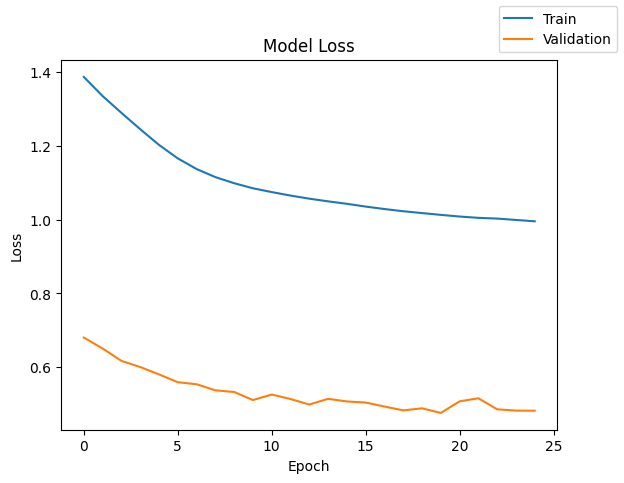

In [332]:
plot_loss_accuracy(history, "loss")

In [333]:
model_0_train_perf = model_performance_classification(model0, X_train, y_train)
model_0_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.745833,0.745833,0.825199,0.767491


In [334]:
model_0_valid_perf = model_performance_classification(model0, X_val, y_val)
model_0_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.754,0.754,0.828999,0.774532


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


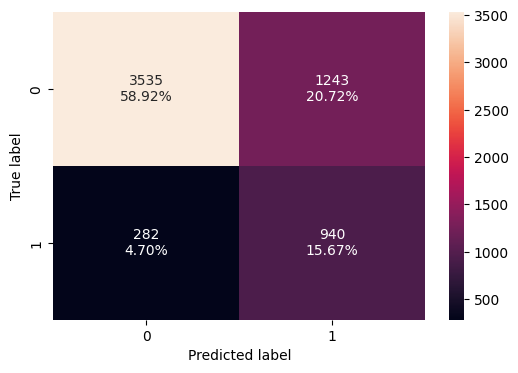

In [335]:
confusion_matrix_sklearn(model0, X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


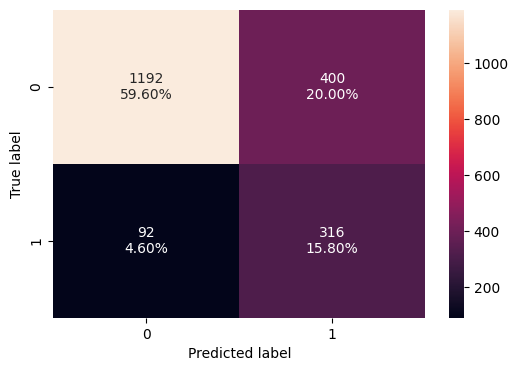

In [336]:
confusion_matrix_sklearn(model0, X_val, y_val)

- Train F1 score of ~0.78 and Validation F1 score of ~0.79 indicate consistent performance of the model between training and testing datasets.
- Even though it's a good score, the rate of improvement over the epochs is still low.
- Predection on Confusion matrix for train and Validation indicates, Model is performaning good. Lets try to improve further

### Model 1

- After the 4th epoch, the model's rate of learning is low.
- Let's try adding momentum to check whether it's accelerating the learning process.

In [337]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [338]:
#Initializing the neural network
model1 = Sequential()
model1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model1.add(Dense(7,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

In [339]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [340]:
optimizer = tf.keras.optimizers.SGD(momentum=0.7)    # defining SGD as the optimizer to be used
model1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [341]:
start = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4399 - val_loss: 0.6013
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1608 - val_loss: 0.5550
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0576 - val_loss: 0.5097
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0365 - val_loss: 0.4809
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0308 - val_loss: 0.4858
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0180 - val_loss: 0.4766
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0014 - val_loss: 0.4834
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9749 - val_loss: 0.4744
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9966 - val_loss: 0.4530
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9180 - val_loss: 0.4646
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9350 - val_loss: 0.4545
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9383 - val_lo

In [342]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.121272563934326


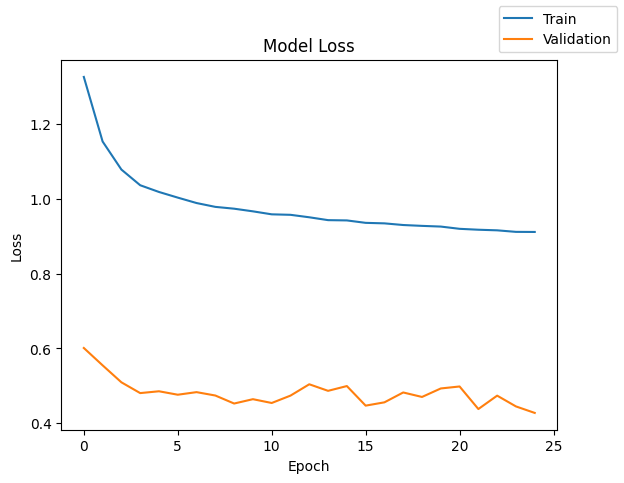

In [343]:
plot_loss_accuracy(history,'loss')

In [344]:
model_1_train_perf = model_performance_classification(model1, X_train, y_train)
model_1_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8155,0.8155,0.847037,0.82578


In [345]:
model_1_valid_perf = model_performance_classification(model1, X_val, y_val)
model_1_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8145,0.8145,0.842224,0.823969


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


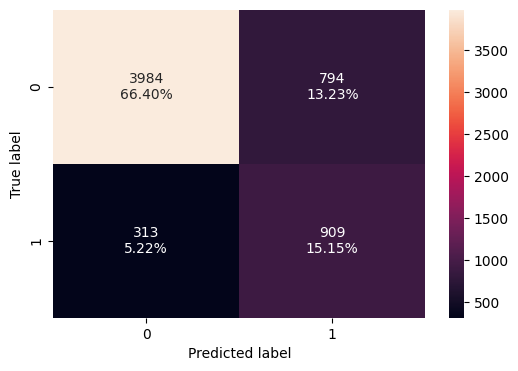

In [346]:
confusion_matrix_sklearn(model1, X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


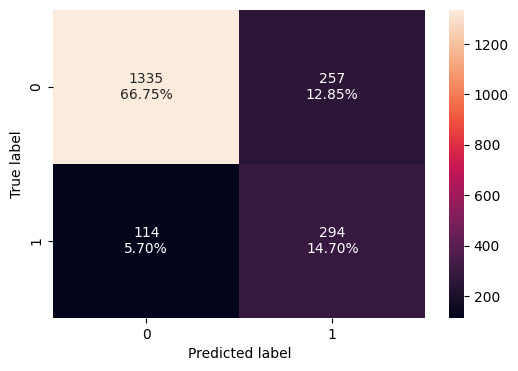

In [347]:
confusion_matrix_sklearn(model1, X_val, y_val)

- As expected, there is a improvement in the train scores.
- But, the difference between the train and valid scores have increased.
- Predection on Confusion matrix for train and Validation indicates, Model  performaning good and remain same. Lets try to improve further

### Model 2

- Let's change the optimizer to Adam
    - This will introduce momentum as well as an adaptive learning rate

In [348]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [349]:
#Initializing the neural network
model2 = Sequential()
model2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model2.add(Dense(7,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))

In [350]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [351]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model2.compile(loss='binary_crossentropy', optimizer=optimizer)

In [352]:
start = time.time()
history = model2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4417 - val_loss: 0.7235
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2842 - val_loss: 0.6993
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1996 - val_loss: 0.6823
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1750 - val_loss: 0.6536
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1284 - val_loss: 0.6403
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1037 - val_loss: 0.6162
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0888 - val_loss: 0.6012
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0578 - val_loss: 0.5970
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0536 - val_loss: 0.5787
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0456 - val_loss: 0.5818
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0580 - val_loss: 0.5576
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0163 - val_lo

In [353]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.316154479980469


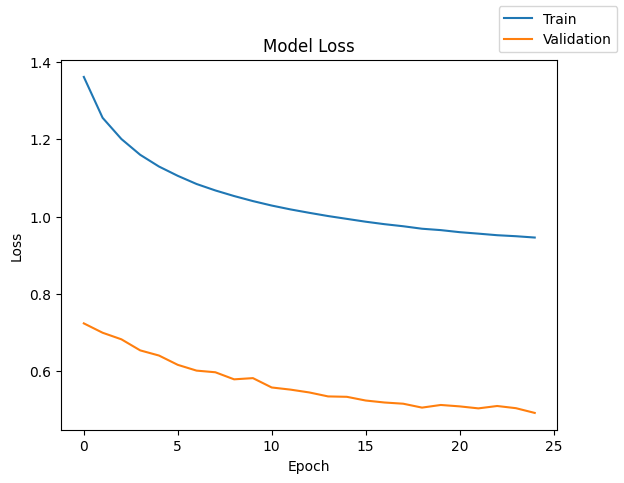

In [354]:
plot_loss_accuracy(history,'loss')

In [355]:
model_2_train_perf = model_performance_classification(model2, X_train, y_train)
model_2_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8095,0.8095,0.84476,0.820775


In [356]:
model_2_valid_perf = model_performance_classification(model2, X_val, y_val)
model_2_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8085,0.8085,0.837149,0.818379


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


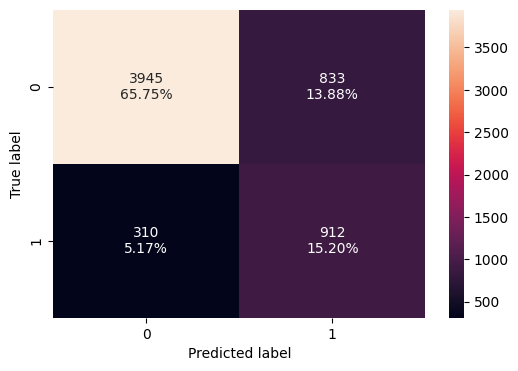

In [357]:
confusion_matrix_sklearn(model2, X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


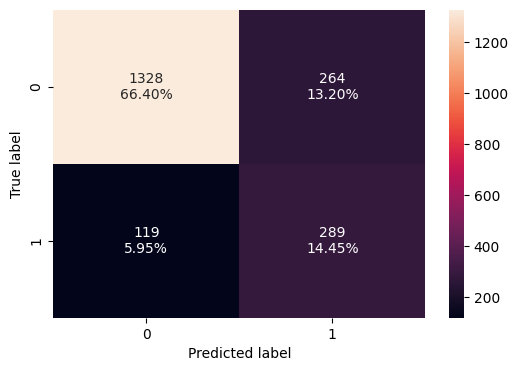

In [358]:
confusion_matrix_sklearn(model2, X_val, y_val)

- The difference between the train and valid scores have decreased but not to a great extent.
- Predection on Confusion matrix for train and Validation indicates, Model performance remain same.

### Model 3

- The difference between the train loss and test loss is high.
- Let's add dropout to regularize it.

In [359]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [360]:
#Initializing the neural network
model3 = Sequential()
model3.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model3.add(Dropout(0.4))
model3.add(Dense(7,activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation="sigmoid"))

In [361]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [362]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model3.compile(loss='binary_crossentropy', optimizer=optimizer)

In [363]:
start = time.time()
history = model3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5320 - val_loss: 0.6672
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3487 - val_loss: 0.6419
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2974 - val_loss: 0.6031
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2667 - val_loss: 0.5599
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2268 - val_loss: 0.5454
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1798 - val_loss: 0.5356
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1555 - val_loss: 0.5271
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1162 - val_loss: 0.5158
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1367 - val_loss: 0.5037
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1201 - val_loss: 0.5171
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0797 - val_loss: 0.5087
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0970 - val_lo

In [364]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.466840744018555


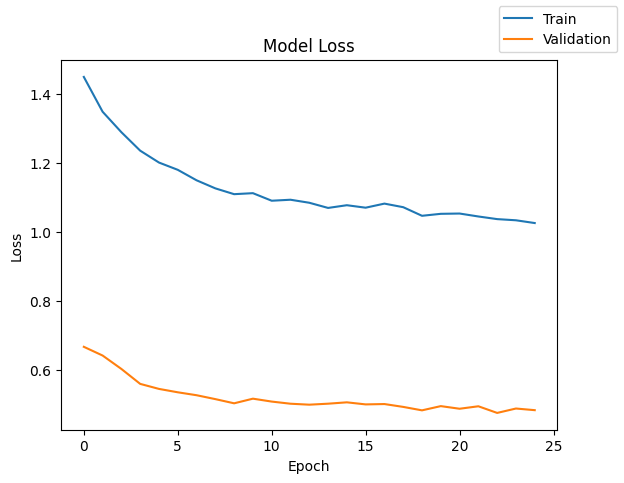

In [365]:
plot_loss_accuracy(history,'loss')

In [366]:
model_3_train_perf = model_performance_classification(model3, X_train, y_train)
model_3_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7675,0.7675,0.833053,0.785973


In [367]:
model_3_valid_perf = model_performance_classification(model3, X_val, y_val)
model_3_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7815,0.7815,0.838308,0.79785


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


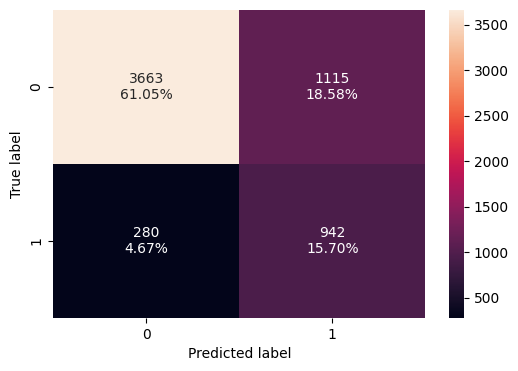

In [368]:
confusion_matrix_sklearn(model3, X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


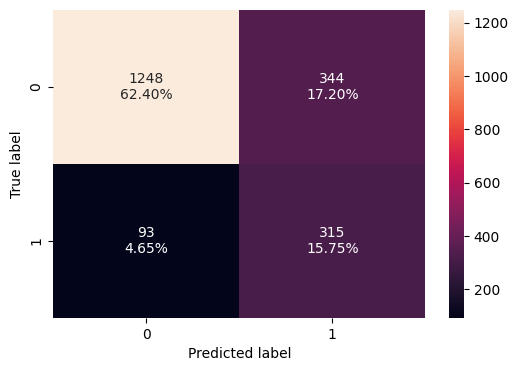

In [369]:
confusion_matrix_sklearn(model3, X_val, y_val)

- The difference between train and validation scores has still not reduced.
- Confusion matrix performance remain unchanged

### Model 4

- The scores are still not that good.
- Let's add batch normalization to see whether we can stabilize the training process and thereby improve the scores.

In [370]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [371]:
#Initializing the neural network
model4 = Sequential()
model4.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model4.add(BatchNormalization())
model4.add(Dense(7,activation="relu"))
model4.add(BatchNormalization())
model4.add(Dense(1,activation="sigmoid"))

In [372]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14)                  │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 393 (1.54 KB)

 Trainable params: 351 (1.37 KB)

 Non-trainable params: 42 (168.00 B)

In [373]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model4.compile(loss='binary_crossentropy', optimizer=optimizer)

In [374]:
start = time.time()
history = model4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5931 - val_loss: 0.6744
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3162 - val_loss: 0.5993
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1947 - val_loss: 0.5438
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1459 - val_loss: 0.5160
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0931 - val_loss: 0.5083
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0230 - val_loss: 0.4986
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0043 - val_loss: 0.4917
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0175 - val_loss: 0.4865
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9896 - val_loss: 0.4878
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9663 - val_loss: 0.4879
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9591 - val_loss: 0.4885
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9452 - val_lo

In [375]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.138794183731079


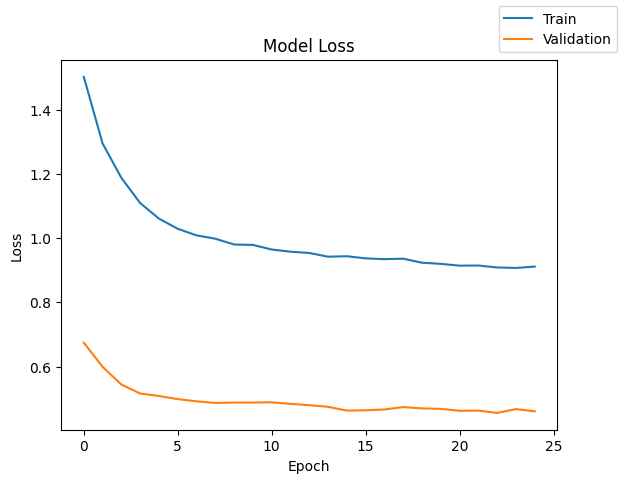

In [376]:
plot_loss_accuracy(history,'loss')

In [377]:
model_4_train_perf = model_performance_classification(model4, X_train, y_train)
model_4_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.804667,0.804667,0.847258,0.817515


In [378]:
model_4_valid_perf = model_performance_classification(model4, X_val, y_val)
model_4_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7905,0.7905,0.834272,0.804235


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


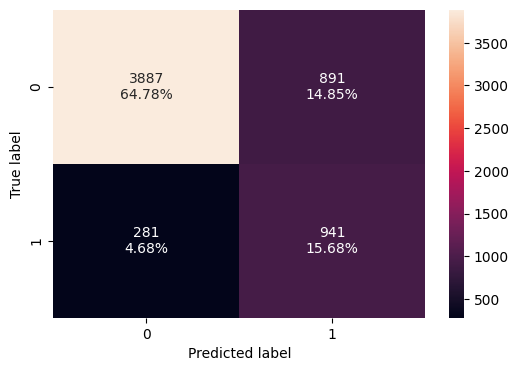

In [379]:
confusion_matrix_sklearn(model4, X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


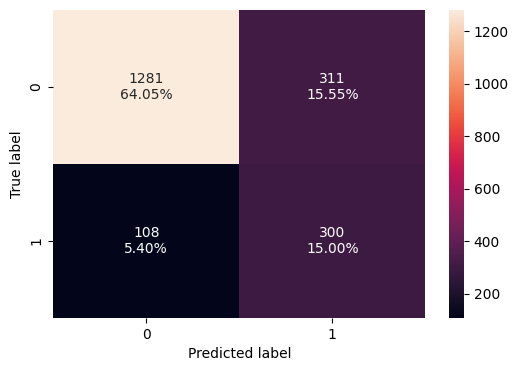

In [380]:
confusion_matrix_sklearn(model4, X_val, y_val)

- There's no improvement in the scores.

### Model 5

- Let's add both batchnormalization and dropout.

In [381]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [382]:
#Initializing the neural network
model5 = Sequential()
model5.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))
model5.add(Dense(7,activation="relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(1,activation="sigmoid"))

In [383]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14)                  │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7)                   │              28 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 393 (1.54 KB)

 Trainable params: 351 (1.37 KB)

 Non-trainable params: 42 (168.00 B)

In [384]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model5.compile(loss='binary_crossentropy', optimizer=optimizer)

In [385]:
start = time.time()
history = model5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.9500 - val_loss: 0.6907
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5884 - val_loss: 0.6111
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4053 - val_loss: 0.5795
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3559 - val_loss: 0.5673
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2677 - val_loss: 0.5512
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2456 - val_loss: 0.5390
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2028 - val_loss: 0.5277
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2109 - val_loss: 0.5153
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1759 - val_loss: 0.5085
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1317 - val_loss: 0.5073
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1285 - val_loss: 0.5042
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1121 - val_lo

In [386]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.482461929321289


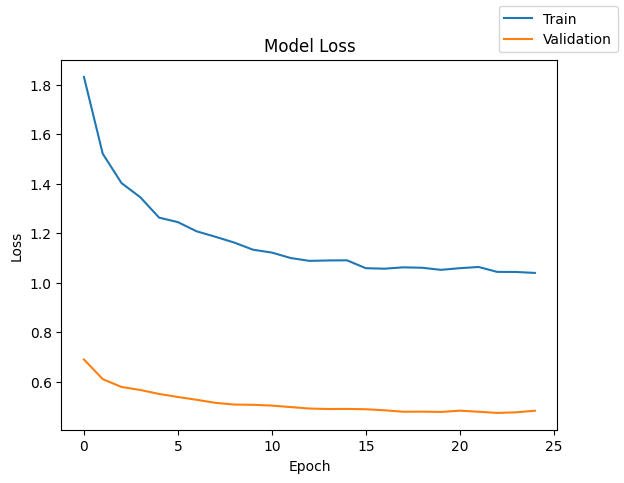

In [387]:
plot_loss_accuracy(history,'loss')

In [388]:
model_5_train_perf = model_performance_classification(model5, X_train, y_train)
model_5_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.757167,0.757167,0.832233,0.777512


In [389]:
model_5_valid_perf = model_performance_classification(model5, X_val, y_val)
model_5_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7625,0.7625,0.834159,0.782037


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


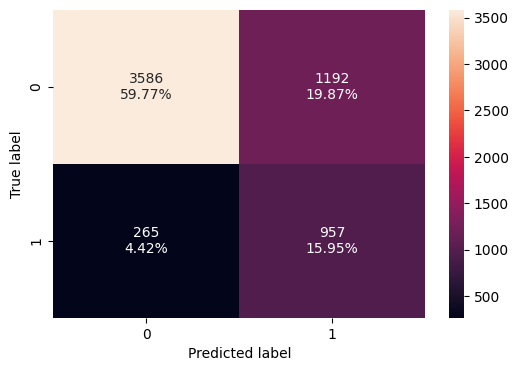

In [390]:
confusion_matrix_sklearn(model5, X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


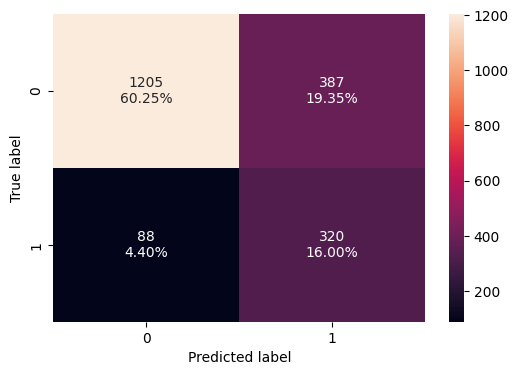

In [391]:
confusion_matrix_sklearn(model5, X_val, y_val)

- There's no improvement in the scores, but there has been a slight decrease in the difference between train and validation scores.

### Model 6

- Let's initialize the weights using He normal.
- We'll also use only Dropout for regularization.

In [392]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [393]:
#Initializing the neural network
model6 = Sequential()
model6.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model6.add(Dropout(0.4))
model6.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model6.add(Dropout(0.2))
model6.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [394]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [395]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model6.compile(loss='binary_crossentropy', optimizer=optimizer)

In [396]:
start = time.time()
history = model6.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4721 - val_loss: 0.6904
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3592 - val_loss: 0.6634
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3254 - val_loss: 0.6449
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2656 - val_loss: 0.6274
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2413 - val_loss: 0.6059
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1983 - val_loss: 0.5658
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1879 - val_loss: 0.5607
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1536 - val_loss: 0.5484
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1574 - val_loss: 0.5365
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1694 - val_loss: 0.5388
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1383 - val_loss: 0.5220
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1311 - val_lo

In [397]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.587759256362915


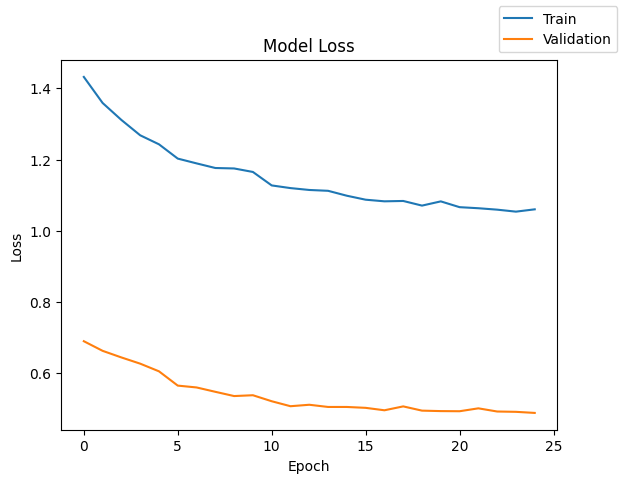

In [398]:
plot_loss_accuracy(history,'loss')

In [399]:
model_6_train_perf = model_performance_classification(model6, X_train, y_train)
model_6_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.791,0.791,0.83454,0.804687


In [400]:
model_6_valid_perf = model_performance_classification(model6, X_val, y_val)
model_6_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7955,0.7955,0.837347,0.808641


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


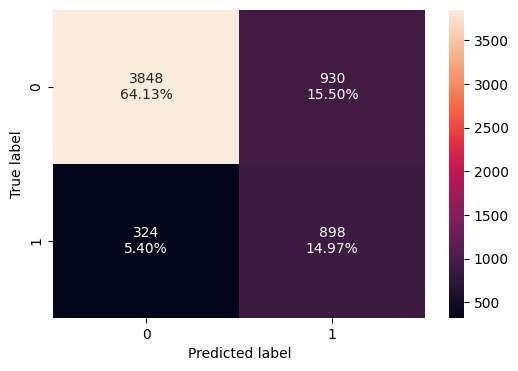

In [401]:
confusion_matrix_sklearn(model6, X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


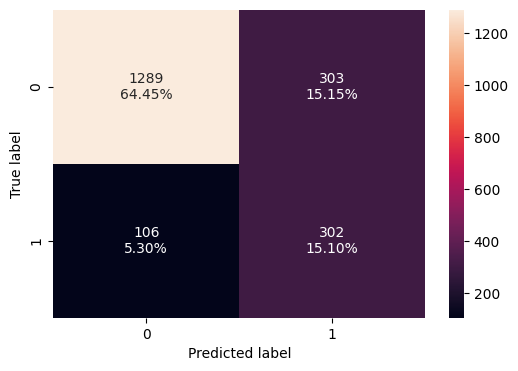

In [402]:
confusion_matrix_sklearn(model6, X_val, y_val)

- There's a slight improvement in the scores.
- The difference between train and validation scores has also reduced.

## Model Performance Comparison and Final Model Selection

In [403]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [404]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [405]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.745833,0.815500,0.809500,0.767500,0.804667,0.757167,0.791000
Recall,0.745833,0.815500,0.809500,0.767500,0.804667,0.757167,0.791000
Precision,0.825199,0.847037,0.844760,0.833053,0.847258,0.832233,0.834540
F1 Score,0.767491,0.825780,0.820775,0.785973,0.817515,0.777512,0.804687


In [406]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.754000,0.814500,0.808500,0.781500,0.790500,0.762500,0.795500
Recall,0.754000,0.814500,0.808500,0.781500,0.790500,0.762500,0.795500
Precision,0.828999,0.842224,0.837149,0.838308,0.834272,0.834159,0.837347
F1 Score,0.774532,0.823969,0.818379,0.797850,0.804235,0.782037,0.808641


In [407]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Neural Network (SGD, No Regularization)",-0.007041
"Neural Network (SGD with Momentum, No Regularization)",0.001812
"Neural Network (Adam , No Regularization)",0.002396
"Neural Network (Adam, dropout [0.4,0.2])",-0.011878
"Neural Network (Adam, Batch Normalization)",0.013280
"Neural Network (dropout [0.4,0.2], Batch Normalization)",-0.004525
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",-0.003954


Neural Network with Adam Optimizer and Drop out of 0.4 and 0.2 did perform better than other model. So lets select this model as Final and check performance

### Final Model

In [408]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [409]:
#Initializing the neural network
model_f = Sequential()
model_f.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_f.add(Dropout(0.4))
model_f.add(Dense(7,activation="relu"))
model_f.add(Dropout(0.2))
model_f.add(Dense(1,activation="sigmoid"))

In [410]:
model_f.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [411]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_f.compile(loss='binary_crossentropy', optimizer=optimizer)

In [412]:
start = time.time()
history = model_f.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.3843 - val_loss: 0.6558
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3370 - val_loss: 0.6341
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3011 - val_loss: 0.6018
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2471 - val_loss: 0.5784
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1928 - val_loss: 0.5499
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2054 - val_loss: 0.5323
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1591 - val_loss: 0.5165
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1358 - val_loss: 0.5035
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0998 - val_loss: 0.4927
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0880 - val_loss: 0.4947
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1130 - val_loss: 0.4765
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0774 - val_lo

In [413]:
y_train_pred = model_f.predict(X_train)
y_val_pred = model_f.predict(X_val)
y_test_pred = model_f.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [414]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4778
           1       0.48      0.75      0.59      1222

    accuracy                           0.78      6000
   macro avg       0.70      0.77      0.72      6000
weighted avg       0.83      0.78      0.80      6000



In [415]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1592
           1       0.50      0.75      0.60       408

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



In [416]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1593
           1       0.46      0.70      0.56       407

    accuracy                           0.77      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.82      0.77      0.79      2000



188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


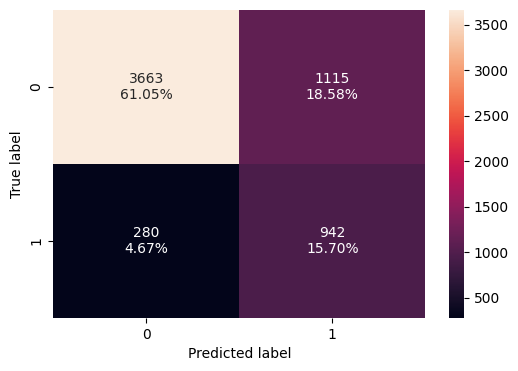

In [417]:
confusion_matrix_sklearn(model3, X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


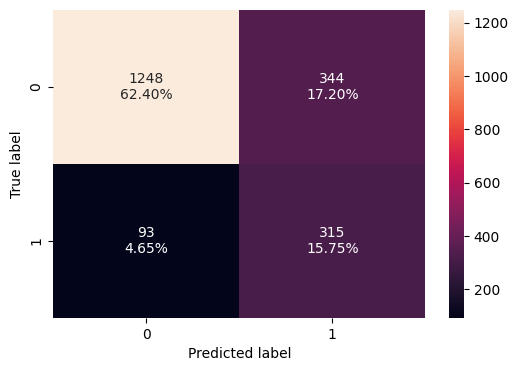

In [418]:
confusion_matrix_sklearn(model3, X_val, y_val)

### Feature Selection

In [419]:
importances = permutation_importance_f1(model_f, X_test, y_test)
importance_dict = importances.item()
kvp_f = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse= True))
from IPython.display import clear_output
clear_output(wait=True)
print("Feature Importance for model_f")
for feature, importance in kvp_f.items():
    print(f"Feature: {feature}, Value: {importance}")

Feature Importance for model_f
Feature: Age, Value: 0.05975915636263962
Feature: NumOfProducts_2, Value: 0.052263754585865185
Feature: IsActiveMember_1, Value: 0.013724500415475238
Feature: Geography_Germany, Value: 0.013051788849638424
Feature: NumOfProducts_3, Value: 0.0082008173006477
Feature: Balance, Value: 0.008110366866419194
Feature: Gender_Male, Value: 0.00289274823670016
Feature: NumOfProducts_4, Value: 0.002338674515589667
Feature: EstimatedSalary, Value: 0.0007241145645505709
Feature: Geography_Spain, Value: -0.0007766147651530053
Feature: HasCrCard_1, Value: -0.0008383268604436056
Feature: CreditScore, Value: -0.0008627797910416568
Feature: Tenure, Value: -0.005003040341532539


## Actionable Insights and Business Recommendations

- **Age of a customer** plays important role, younger the customer less the CreditScore. In order to build a better **Credit score they need to have a history**. Younger customer are required and before offering new products, Bank should verifies all required criteria
- **More products** a Customer have indicate he is not so stable in Financial (unless the products are typeof Investment). Bank should **offer only required product** for customer growth rather than to make him a defaulter. Eventually he will leave the bank. **All customer left bank who had 4 Product **indicate a crucial scenario
- Make sure **customer is active with Bank** what ever product he has, an Active customer indicates stability and longevity with Bank
- **Geography** do play an important role, so Bank should be Geographically **local oriented** rather than centrally operating. Meaning, **catering the needs of local customer** is more important rather than centralizing everything.
- **Balance** the customer has with bank benefits both Bank and Customer. Active customer will have sufficient **Balance for Hard day**s rather than living on pay-check. This shows, a customer should have **reward if he has good balance** with Bank
- **Tenure** with Bank, indicate Customer loyalty with Bank. **Loyal customers need to treated accordingly**.



In [421]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/AIMLColab/Neural Networks/Project/INN_Learner_Notebook_Full_code.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIMLColab/Neural Networks/Project/INN_Learner_Notebook_Full_code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 37 image(s).
[NbConvertApp] Writing 1697230 bytes to /content/drive/MyDrive/AIMLColab/Neural Networks/Project/INN_Learner_Notebook_Full_code.html


<font size=6 color='blue'>Power Ahead</font>
___